In [3]:
import os
import re


import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [4]:
# Define colors for modes
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import seaborn as sns

MODE_COLORS = {"hard": "blue", "soft": "red", "Weady et al.": "black"}
LINE_STYLES = {"$\\lambda = 10^{-2}$": "solid",
               "$\\lambda = 10^{-3}$": "dashed", "$\\lambda = 10^{-4}$": "dotted"}

In [5]:
from load_combined import load_combined

source_folders = [
    "../data/cfl/",
]

# find recursive subfolders within source_folders
sim_dirs = []
for folder in source_folders:
    for root, dirs, files in os.walk(folder):
        # skip if /data as last part of path
        if "logs" in root or "data" in root.split(os.sep)[-1]:
            continue

        if any(f.endswith(".pvtu") for f in os.listdir(root)):
            sim_dirs.append(os.path.join(root))

particles_dict, sim_dict, params_dict = load_combined(sim_dirs, offset=0)

loading ../data/cfl/vtk_output_hard/2.7
loading ../data/cfl/vtk_output_hard/1
loading ../data/cfl/vtk_output_hard/2.1
loading ../data/cfl/vtk_output_hard/2.4
loading ../data/cfl/vtk_output_hard/0.2
loading ../data/cfl/vtk_output_hard/3.3
loading ../data/cfl/vtk_output_hard/1.5
loading ../data/cfl/vtk_output_hard/2
loading ../data/cfl/vtk_output_hard/0.8
loading ../data/cfl/vtk_output_hard/2.2
loading ../data/cfl/vtk_output_hard/3.7
loading ../data/cfl/vtk_output_hard/3.1
loading ../data/cfl/vtk_output_hard/2.9
loading ../data/cfl/vtk_output_hard/2.3
loading ../data/cfl/vtk_output_hard/0.5


In [6]:
sim_dict

,iteration,simulation_time_s,time_since_last_log_s,step,num_particles,num_constraints,colony_radius,recursive_iterations,bbpgd_iterations,max_overlap,...,load_imbalance,dt_s,x,y,z,rank,Mode,Sensitivity,sim_dir,offset
0,0,0.01000,0.103296,0,1,0,0.25500,1,10,0.000000,...,112.00000,0.009927,NaN,NaN,NaN,0,hard,../data/cfl/vtk_output_hard/2.7assumed $\lambd...,.._data_cfl_vtk_output_hard,0
1,1,2.41364,6.664370,1470,8,7,5.25534,1,10,0.000004,...,112.00000,0.000792,NaN,NaN,NaN,0,hard,../data/cfl/vtk_output_hard/2.7assumed $\lambd...,.._data_cfl_vtk_output_hard,0
2,2,6.04152,25.060200,3786,256,1906,10.25980,4,130,0.000589,...,97.56250,0.001777,NaN,NaN,NaN,0,hard,../data/cfl/vtk_output_hard/2.7assumed $\lambd...,.._data_cfl_vtk_output_hard,0
3,3,7.12230,32.471500,4436,1024,8442,15.27070,4,320,0.000476,...,38.93750,0.001867,NaN,NaN,NaN,0,hard,../data/cfl/vtk_output_hard/2.7assumed $\lambd...,.._data_cfl_vtk_output_hard,0
4,4,7.84908,36.742200,4861,2044,20309,20.28450,5,480,0.000987,...,20.21920,0.001879,NaN,NaN,NaN,0,hard,../data/cfl/vtk_output_hard/2.7assumed $\lambd...,.._data_cfl_vtk_output_hard,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,16,11.22780,180.097000,46826,27410,432761,80.28850,5,540,0.000661,...,2.10434,0.000337,NaN,NaN,NaN,0,hard,../data/cfl/vtk_output_hard/0.5assumed $\lambd...,.._data_cfl_vtk_output_hard,0
305,17,11.42380,202.276000,47403,31965,506844,85.29000,5,540,0.000930,...,1.87105,0.000357,NaN,NaN,NaN,0,hard,../data/cfl/vtk_output_hard/0.5assumed $\lambd...,.._data_cfl_vtk_output_hard,0
306,18,11.60110,193.939000,47913,35759,566020,90.30020,5,1270,0.000973,...,1.76336,0.000350,NaN,NaN,NaN,0,hard,../data/cfl/vtk_output_hard/0.5assumed $\lambd...,.._data_cfl_vtk_output_hard,0
307,19,11.78090,229.995000,48401,39334,624778,95.30250,5,870,0.000987,...,1.71414,0.000389,NaN,NaN,NaN,0,hard,../data/cfl/vtk_output_hard/0.5assumed $\lambd...,.._data_cfl_vtk_output_hard,0


In [7]:
# print sizte of particles_dict in MB
print(f"Loaded particles_dict with {particles_dict.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Loaded sim_dict with {sim_dict.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Loaded params_dict with {params_dict.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

Loaded particles_dict with 282.42 MB
Loaded sim_dict with 0.12 MB
Loaded params_dict with 0.01 MB


In [8]:
sim_dict.keys()

Index(['iteration', 'simulation_time_s', 'time_since_last_log_s', 'step',
       'num_particles', 'num_constraints', 'colony_radius',
       'recursive_iterations', 'bbpgd_iterations', 'max_overlap', 'residual',
       'memory_usage_mb', 'peak_memory_mb', 'cpu_time_s', 'mpi_comm_time_s',
       'load_imbalance', 'dt_s', 'x', 'y', 'z', 'rank', 'Mode', 'Sensitivity',
       'sim_dir', 'offset'],
      dtype='object')

In [9]:
particles_dict["Sensitivity"]

0         ../data/cfl/vtk_output_hard/2.7assumed $\lambd...
1         ../data/cfl/vtk_output_hard/2.7assumed $\lambd...
2         ../data/cfl/vtk_output_hard/2.7assumed $\lambd...
3         ../data/cfl/vtk_output_hard/2.7assumed $\lambd...
4         ../data/cfl/vtk_output_hard/2.7assumed $\lambd...
                                ...                        
633153    ../data/cfl/vtk_output_hard/0.5assumed $\lambd...
633154    ../data/cfl/vtk_output_hard/0.5assumed $\lambd...
633155    ../data/cfl/vtk_output_hard/0.5assumed $\lambd...
633156    ../data/cfl/vtk_output_hard/0.5assumed $\lambd...
633157    ../data/cfl/vtk_output_hard/0.5assumed $\lambd...
Name: Sensitivity, Length: 633158, dtype: object

In [10]:
particles_dict["cfl"] = particles_dict["Sensitivity"].str.extract(r"/([\d.]+)assumed").astype(float)

In [11]:
sim_dict["cfl"] = sim_dict["Sensitivity"].str.extract(r"/([\d.]+)assumed").astype(float)

In [12]:
sim_dict.keys()

Index(['iteration', 'simulation_time_s', 'time_since_last_log_s', 'step',
       'num_particles', 'num_constraints', 'colony_radius',
       'recursive_iterations', 'bbpgd_iterations', 'max_overlap', 'residual',
       'memory_usage_mb', 'peak_memory_mb', 'cpu_time_s', 'mpi_comm_time_s',
       'load_imbalance', 'dt_s', 'x', 'y', 'z', 'rank', 'Mode', 'Sensitivity',
       'sim_dir', 'offset', 'cfl'],
      dtype='object')

In [13]:
from scipy.optimize import curve_fit

runtimes = []
for k, g in sim_dict.groupby(["Mode", "cfl"]):

    final_time = g["cpu_time_s"].max()
    final_radius = g["colony_radius"].max()
    total_bbpgd_iterations = g["bbpgd_iterations"].mean()

    runtimes.append(pd.DataFrame({
        "runtime [min]": [final_time / 60],
        "Mode": [k[0]],
        "cfl": [k[1]],
        "colony_radius": [final_radius],
        "total_bbpgd_iterations": [total_bbpgd_iterations if final_radius >= 100 else 20000],
        "avg_step_time": [g["mpi_comm_time_s"].mean()],
        "dt_s": [g["dt_s"].mean()]
    }))
runtimes = pd.concat(runtimes, ignore_index=True)

runtimes

,runtime [min],Mode,cfl,colony_radius,total_bbpgd_iterations,avg_step_time,dt_s
0,119.523500,hard,0.2,100.0010,192.380952,0.106270,0.000530
1,50.467833,hard,0.5,100.0070,363.809524,0.159080,0.000739
2,43.628167,hard,0.8,100.0050,844.285714,0.312608,0.000970
3,40.651000,hard,1.0,100.0200,1333.333333,0.448646,0.001130
4,32.912833,hard,1.5,100.0480,1895.714286,0.564926,0.001518
5,30.616500,hard,2.0,100.0490,2771.904762,0.752198,0.001939
6,31.044167,hard,2.1,100.0460,3077.142857,0.861659,0.002035
7,30.503333,hard,2.2,100.0340,3241.904762,0.862365,0.002123
8,31.738167,hard,2.3,100.0050,3731.428571,1.024582,0.002222
9,31.075167,hard,2.4,100.0200,3541.428571,0.943000,0.002306


In [14]:
# def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
#              xscale=None, yscale=None,             **kwargs):

#     fig, ax = plt.subplots(figsize=(10, 6))
#     outname = outname or f"{y}_vs_{x}.png"

#     sns.lineplot(data, x=x,                 y=y,
#                  ax=ax, **kwargs, lw=2, ms=10, palette="tab10", legend='brief', 
#                  )

#     if xscale:
#         ax.set_xscale(xscale)
#     if yscale:
#         ax.set_yscale(yscale)

#     ax.set_xlabel(xlabel or x, fontsize=20)
#     ax.set_ylabel(ylabel or y, fontsize=20)
#     ax.tick_params(axis='x', labelsize=16)
#     ax.tick_params(axis='y', labelsize=16)
#     ax.grid(True)
#     ax.legend(fontsize=22)

#     if outname:
#         fig.savefig(outname, dpi=300, bbox_inches="tight")
#     return fig, ax

In [15]:
MODE_COLORS = {"hard": "blue", "soft": "red", "Weady et al.": "black"}
LINE_STYLES = {"$\\lambda = 10^{-2}$": "solid",
               "$\\lambda = 10^{-3}$": "dashed", "$\\lambda = 10^{-4}$": "dotted"}


def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density", hue="Mode",
             xscale=None, yscale=None, label=None,
             **kwargs):

    fig, ax = plt.subplots(figsize=(10, 6))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 hue=hue, marker="o", ax=ax, **kwargs, lw=2, ms=10)

    if xscale:
        ax.set_xscale(xscale, base=2)
    if yscale:
        ax.set_yscale(yscale, base=2)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(which="both", axis="x")
    ax.grid(which="major", axis="y")

    # set minor grid
    ax.minorticks_on()

    ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")
    return fig, ax

Minimum CFL where colony_radius >= 100: 3.7
Linear model to predict BBPGD iterations: y = 1770.02 * cfl + -494.29


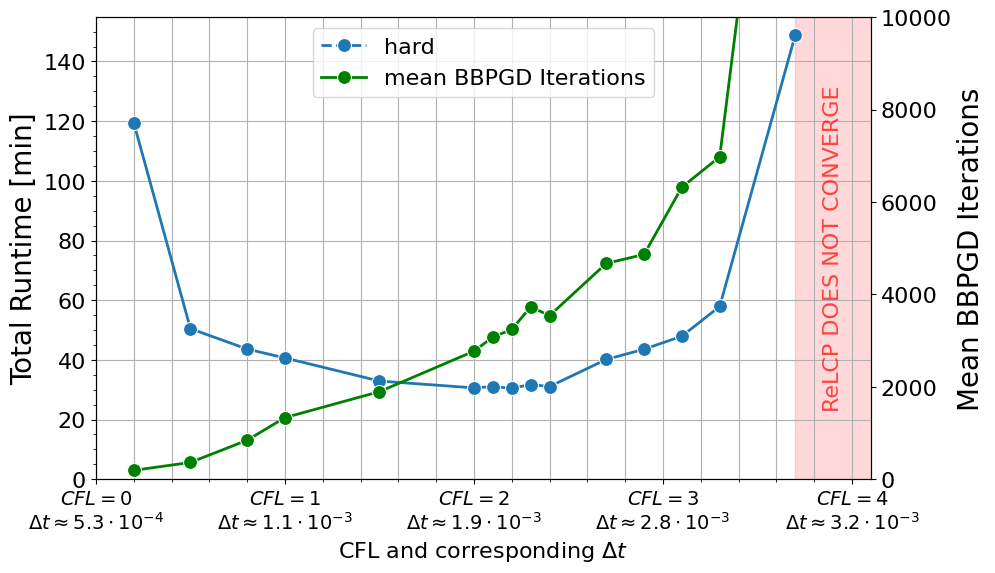

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = makeplot(runtimes, x="cfl",
                   y="runtime [min]", ylabel="Total Runtime [min]",
                   label="Total Runtime [min]")
ax.lines[1].set_linestyle("--")

ax2 = ax.twinx()
sns.lineplot(data=runtimes, x='cfl', y='total_bbpgd_iterations',
             ax=ax2, color='green', lw=2, label='mean BBPGD Iterations', marker="o", ms=10)
ax2.set_ylabel('Mean BBPGD Iterations', fontsize=20)
ax2.tick_params(axis='y', labelsize=16)

# Compute average Δt per CFL (only where colony_radius > 5)
avg_dt_per_cfl = runtimes[runtimes["colony_radius"] > 5].groupby("cfl")[
    "dt_s"].mean()

# Define x positions for tick labels
tick_cfls = np.array([0, 1, 2, 3, 4, 5])

# Interpolate Δt for those specific CFLs
interp_dt = np.interp(
    tick_cfls, avg_dt_per_cfl.index.values, avg_dt_per_cfl.values)

# Set both CFL and Δt on x-axis tick labels
ax.set_xticks(tick_cfls)
ax.set_xticklabels([
    f"$CFL ={cfl:.0f}$\n$\\Delta t \\approx {float(mant):.1f}\\cdot10^{{{int(exp)}}}$"
    for cfl, dt in zip(tick_cfls, interp_dt)
    for mant, exp in [f"{dt:.1e}".split("e")]
], fontsize=14)

ax.set_xlabel("CFL and corresponding $\\Delta t$", fontsize=16)

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.get_legend().remove()
ax2.get_legend().remove()
ax.legend(lines + lines2, labels + labels2, fontsize=16, loc='upper center')

# Find min CFL where colony_radius < 100
valid_runtimes = runtimes[runtimes["colony_radius"] < 100]
min_cfl = valid_runtimes["cfl"].min()
print(f"Minimum CFL where colony_radius >= 100: {min_cfl}")

ax2.set_ylim(0, 10000)
# Highlight region and annotate
ax.axvspan(min_cfl, 5, color="red", alpha=0.15)
ax2.text(min_cfl + 0.2, ax2.get_ylim()[1]*0.5, "ReLCP DOES NOT CONVERGE",
         color="red", fontsize=16, rotation=90, alpha=0.7,
         ha='center', va='center', rotation_mode='anchor')



# fit a linear model to predict avg number of bbpgd iterations based on cfl
from sklearn.linear_model import LinearRegression

index = runtimes["cfl"] <= 3

X = runtimes[["cfl"]][index]
y = runtimes["total_bbpgd_iterations"][index]

model = LinearRegression()
model.fit(X, y)

print(
    f"Linear model to predict BBPGD iterations: y = {model.coef_[0]:.2f} * cfl + {model.intercept_:.2f}"
)

cs=np.linspace(0, 4, 100)
# ax2.plot(cs, model.predict(cs.reshape(-1, 1)), color='green', linestyle='--', label='Linear Fit BBPGD Iterations')

ax.set_ylim(0, None)
ax.set_xlim(0, 4.1)
fig.savefig('cfl_vs_runtime_and_constraints.png', dpi=300, bbox_inches="tight")

(array([3475.59528918]), np.float64(-2858.0199458140814))

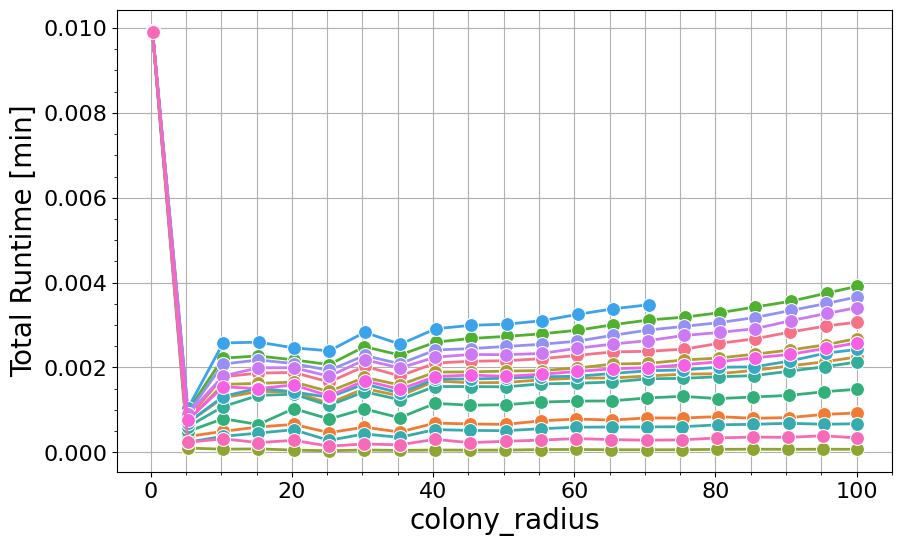

In [19]:
fig, ax = makeplot(sim_dict, x="colony_radius",
                   y="dt_s", ylabel="Total Runtime [min]",
                   label="Total Runtime [min]", hue="Sensitivity")
# delete legend

ax.legend().remove()